# Part 1

Load json file 

In [1]:
cd /Users/jjobes/Desktop/ultimate_challenge

/Users/jjobes/Desktop/ultimate_challenge


In [2]:
ls

Ultimate_Challenge.ipynb             ultimate_data_challenge.json
logins.json                          ultimate_data_science_challenge.pdf


In [3]:
import pandas as pd

logins = pd.read_json('logins.json')

In [4]:
logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [5]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
logins.describe()

<ipython-input-6-f0b670fd4367>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  logins.describe()


,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [7]:
# 3.5 months (14.5 weeks) timeline 

# ~93k logins in that time

In [8]:
# any NaN values?

logins.isnull().sum()

login_time    0
dtype: int64

Break down login counts into 15 minute increments

In [9]:
# Add "count" column to count

logins["Count"] = 1
logins.head()

,login_time,Count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [10]:
# Group counts in 15 min increments

logins_15_min = pd.DataFrame(logins.groupby([pd.Grouper(key = 'login_time', freq='15min')]).count())


In [11]:
logins_15_min

,Count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


Visualize 15 min increment login counts

(array([719163., 719177., 719194., 719208., 719222., 719236., 719253.,
        719267.]),
 <a list of 8 Text major ticklabel objects>)

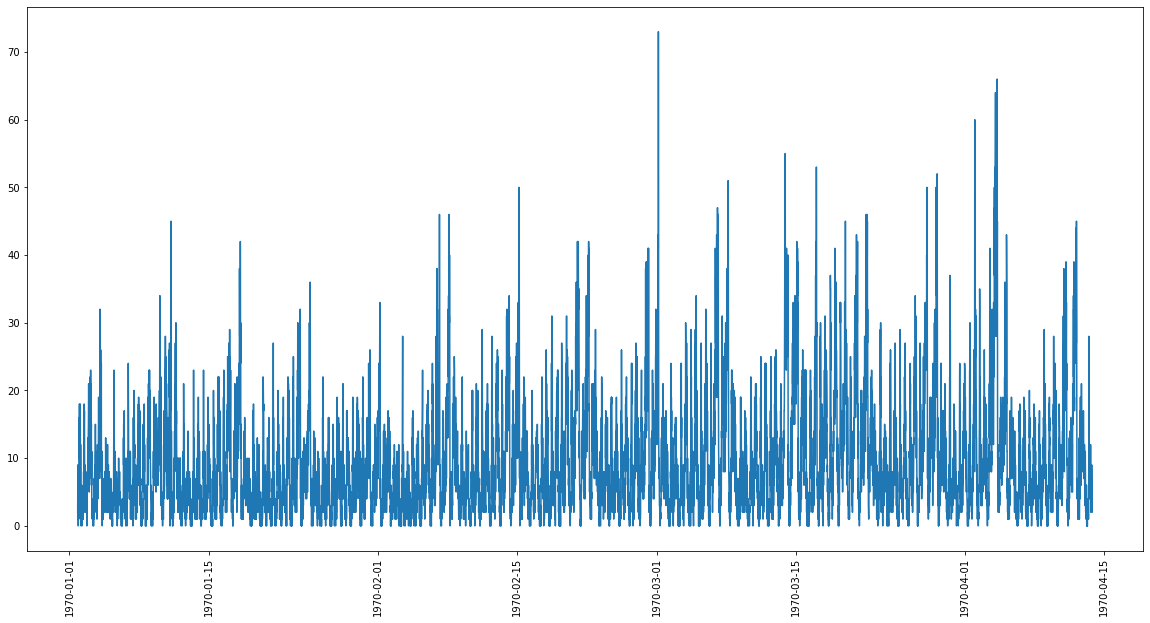

In [12]:
# get a feel the login rate

import datetime
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(logins_15_min)
plt.xticks(rotation=90)


In [13]:
# there is a weekly trend here. 2 peaks per 2 weeks. still too noisy to see trends.

# break down into day to see trends

In [14]:
# Group by day and count

logins_1_day = pd.DataFrame(logins.groupby([pd.Grouper(key = 'login_time', freq='1D')]).count())


In [15]:
logins_1_day.head()

,Count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


(array([719163., 719177., 719194., 719208., 719222., 719236., 719253.,
        719267.]),
 <a list of 8 Text major ticklabel objects>)

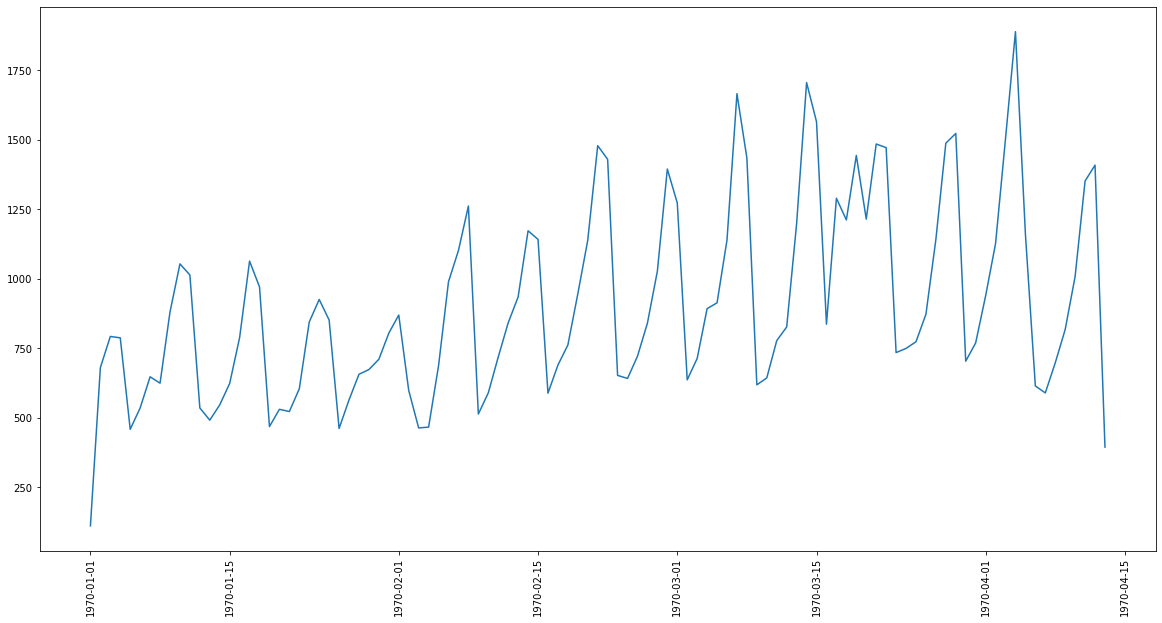

In [16]:
plt.figure(figsize=(20,10))
plt.plot(logins_1_day)
plt.xticks(rotation=90)

In [17]:
# reset index 

logins_1_day.reset_index(inplace=True)


In [18]:
logins_1_day['day_of_week'] = logins_1_day['login_time'].dt.day_name()

In [19]:
logins_1_day.head()

,login_time,Count,day_of_week
0,1970-01-01,112,Thursday
1,1970-01-02,681,Friday
2,1970-01-03,793,Saturday
3,1970-01-04,788,Sunday
4,1970-01-05,459,Monday


In [20]:
for i in list(logins_1_day['day_of_week'].unique()):
    print(logins_1_day[logins_1_day['day_of_week'] == i].mean())

Count    797.333333
dtype: float64
Count    1013.866667
dtype: float64
Count    1291.8
dtype: float64
Count    1211.133333
dtype: float64
Count    588.2
dtype: float64
Count    662.0
dtype: float64
Count    738.5
dtype: float64


<ipython-input-20-ff456605656e>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(logins_1_day[logins_1_day['day_of_week'] == i].mean())


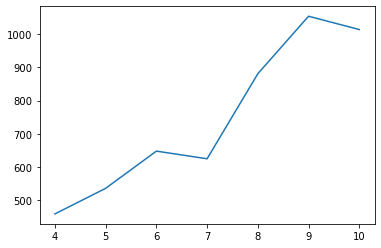

In [21]:
week_1 = logins_1_day.loc[(logins_1_day['login_time'] >= '1970-01-05')
                     & (logins_1_day['login_time'] < '1970-01-12')]

plt.plot(week_1['Count'])
plt.show()

In [22]:
# this is less noisy. lets look at day counts per week.

# 01-01-1970 was a thursday. 

week_1 = logins_1_day.loc[(logins_1_day['login_time'] >= '1970-01-05')
                     & (logins_1_day['login_time'] < '1970-01-12')]

week_2 = logins_1_day.loc[(logins_1_day['login_time'] >= '1970-01-12')
                     & (logins_1_day['login_time'] < '1970-01-19')]

week_3 = logins_1_day.loc[(logins_1_day['login_time'] >= '1970-01-19')
                     & (logins_1_day['login_time'] < '1970-01-26')]

week_4 = logins_1_day.loc[(logins_1_day['login_time'] >= '1970-01-26')
                     & (logins_1_day['login_time'] < '1970-02-02')]

week_5 = logins_1_day.loc[(logins_1_day['login_time'] >= '1970-02-02')
                     & (logins_1_day['login_time'] < '1970-02-09')]

week_6 = logins_1_day.loc[(logins_1_day['login_time'] >= '1970-02-09')
                     & (logins_1_day['login_time'] < '1970-02-16')]

week_7 = logins_1_day.loc[(logins_1_day['login_time'] >= '1970-02-16')
                     & (logins_1_day['login_time'] < '1970-02-23')]

week_8 = logins_1_day.loc[(logins_1_day['login_time'] >= '1970-02-23')
                     & (logins_1_day['login_time'] < '1970-03-02')]

week_9 = logins_1_day.loc[(logins_1_day['login_time'] >= '1970-03-02')
                     & (logins_1_day['login_time'] < '1970-03-09')]

week_10 = logins_1_day.loc[(logins_1_day['login_time'] >= '1970-03-09')
                     & (logins_1_day['login_time'] < '1970-03-16')]

week_11 = logins_1_day.loc[(logins_1_day['login_time'] >= '1970-03-16')
                     & (logins_1_day['login_time'] < '1970-03-23')]

week_12 = logins_1_day.loc[(logins_1_day['login_time'] >= '1970-03-23')
                     & (logins_1_day['login_time'] < '1970-03-30')]

week_13 = logins_1_day.loc[(logins_1_day['login_time'] >= '1970-03-30')
                     & (logins_1_day['login_time'] < '1970-04-06')]



In [23]:
labels = list(week_1['day_of_week'].values)
              
labels

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

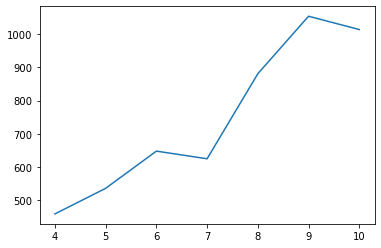

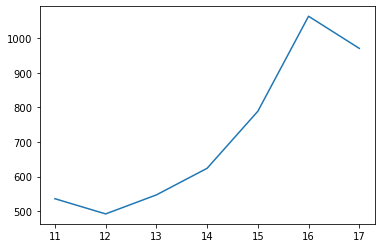

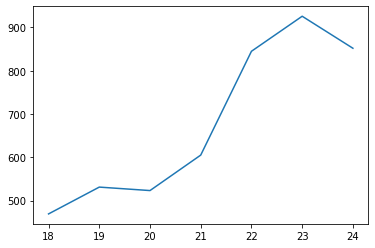

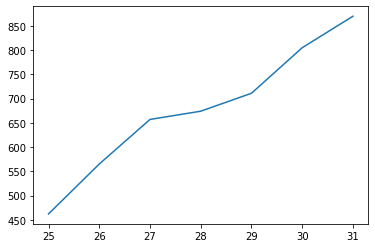

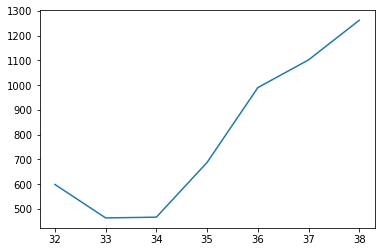

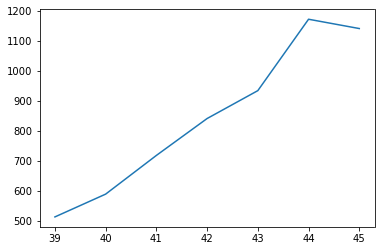

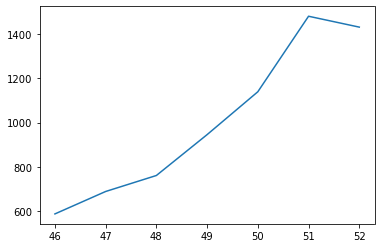

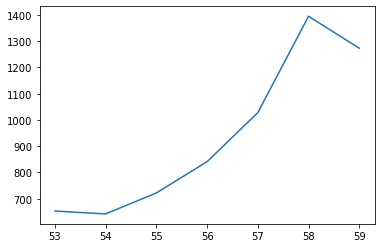

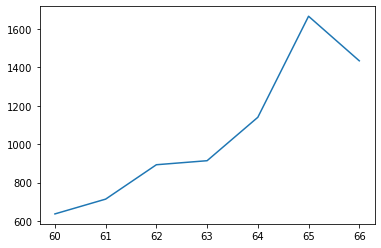

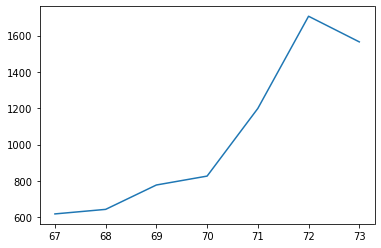

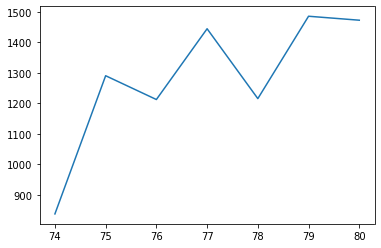

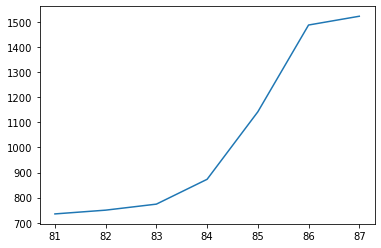

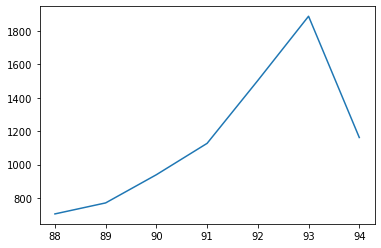

In [24]:
# plot weeks

plt.plot(week_1['Count'], label='week_1')
plt.show()
plt.plot(week_2['Count'], label='week_2')
plt.show()
plt.plot(week_3['Count'], label='week_3')
plt.show()
plt.plot(week_4['Count'], label='week_4')
plt.show()
plt.plot(week_5['Count'], label='week_5')
plt.show()
plt.plot(week_6['Count'], label='week_6')
plt.show()
plt.plot(week_7['Count'], label='week_7')
plt.show()
plt.plot(week_8['Count'], label='week_8')
plt.show()
plt.plot(week_9['Count'], label='week_9')
plt.show()
plt.plot(week_10['Count'], label='week_10')
plt.show()
plt.plot(week_11['Count'], label='week_11')
plt.show()
plt.plot(week_12['Count'], label='week_12')
plt.show()
plt.plot(week_13['Count'], label='week_13')
plt.show()


In [25]:
# there is a clear trend with higher demand on the weekends. 

# Week 11 had more demand during the weekdays. 

# week 11 is during Palm Sunday. The higher counts are likely due to 
# people traveling in preperation for that religious day. 


# Part 2

I would use is change in weekday activity. This has the longest time period to average out any differences seen (5 day weekday vs 2 day weekend). It is easily measured and there will be little error in the measurement. 


We need two tests to determine this:

Gotham:

H0: There is no difference in the mean number of cars entering the bridge from Gotham 
    during weekdays between 6 am and 6 pm, two weeks before reimbursements were offered 
    and the mean number of cars two weeks after reimbursements were offered.
    
H2: There is an INCREASE in the mean number of cars entering the bridge from Gotham 
    during weekdays between 6 am and 6 pm, two weeks before reimbursements were offered 
    and the mean number of cars two weeks after reimbursements were offered.

Metropolis:

H0: There is no difference between the mean number of cars entering the bridge from 
    Metropolis during weekdays between 7 pm and 4 am, two weeks before reimbursements 
    were offered and the mean number of cars two weeks after reimbursements were offered.
    
H2: There is an INCREASE in the mean number of cars entering the bridge from Metropolis 
    during weekdays between 7 pm and 4 am, two weeks before reimbursements were offered 
    and the mean number of cars two weeks after reimbursements were offered.
    

I would use a one-tailed Z-test to determine the p-value of each hypothesis.

If the p-value is less than 0.05 for BOTH tests I would reject the null hypotheses and 
recommend the reimbursement program continue, with the caveat that the study should be 
repeated in a year with more data.

If the p-value is greater than 0.05 for BOTH tests I would fail to reject the null 
hypotheses and recommend that a different program be developed to increase partner 
driving between the two cities.

If the p-value is mixed, so only one hypothesis has a p-value less than 0.05 I would 
recommend that the analysis is inconclusive and that further investigation is needed.

# Part 3 - Data cleaning and EDA

Load in dataset

In [26]:
# put data info pandas dataframe
user_data = pd.read_json('ultimate_data_challenge.json')

user_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [27]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


missing values in avg_rating_of_driver, phone, avg_rating_by_driver

In [28]:
user_data['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [29]:
# Average driver rating missing values could be due to new drivers

# phone may be another provider outside of iPhone or Android

# average rating by driver could be non-rated (may be due to new drivers not knowing this
# is an option)

# the data isn't worth removing these columns with missing values. Replace NaN's with 
# appropriate values

user_data['avg_rating_of_driver'].fillna(user_data['avg_rating_of_driver'].mean(), inplace=True)

user_data['phone'].fillna('Unkown', inplace=True)

user_data['avg_rating_by_driver'].fillna(user_data['avg_rating_by_driver'].mean(), inplace=True)


In [30]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


correct datatypes for each column

In [31]:
# convert dates to datetime objects
user_data['signup_date'] = pd.to_datetime(user_data['signup_date'])
user_data['last_trip_date'] = pd.to_datetime(user_data['last_trip_date'])


In [32]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

Identify 'active' users

In [33]:
# find the date the data was pulled
pull_date = user_data.last_trip_date.max()

# determine 30 days previous to the pull day
cut_off_day = pull_date - pd.Timedelta('30 days')

# add active status to dataframe 0= inactive, 1 = active
user_data['active_status'] = (user_data.last_trip_date > cut_off_day).astype('int')


In [34]:
user_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_status
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [35]:

# add dummies to categorical data
user_data = pd.get_dummies(user_data, columns = ['city', 'phone', 'ultimate_black_user'])

In [36]:
# separate the active and inactive users

active_user = user_data[user_data.active_status == 1]
inactive_user = user_data[user_data.active_status == 0]

In [37]:
# fraction of the observed users that were retained

fraction = round((len(active_user.active_status)/len(user_data.active_status)) * 100, 2)
print('{} percent of users were retained.'.format(fraction))

36.62 percent of users were retained.


In [38]:
list(active_user.columns)

['trips_in_first_30_days',
 'signup_date',
 'avg_rating_of_driver',
 'avg_surge',
 'last_trip_date',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver',
 'active_status',
 'city_Astapor',
 "city_King's Landing",
 'city_Winterfell',
 'phone_Android',
 'phone_Unkown',
 'phone_iPhone',
 'ultimate_black_user_False',
 'ultimate_black_user_True']

In [39]:
boxplot_columns = ['trips_in_first_30_days',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver']

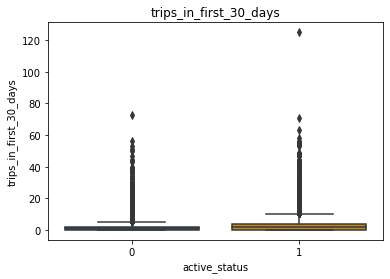

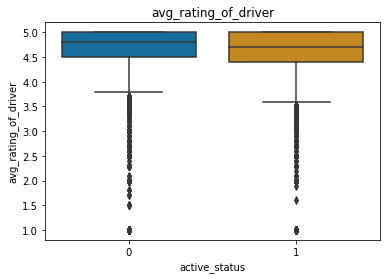

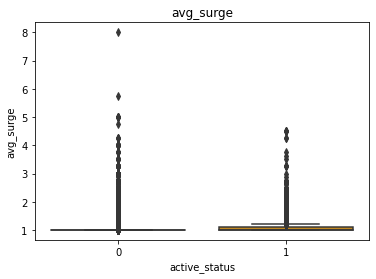

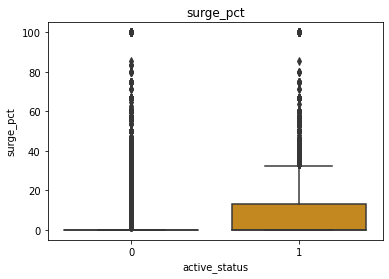

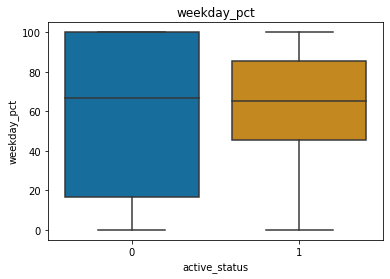

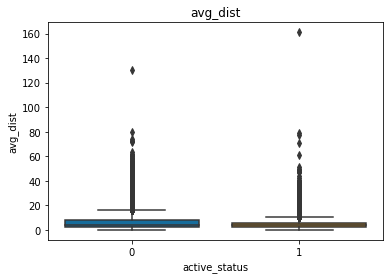

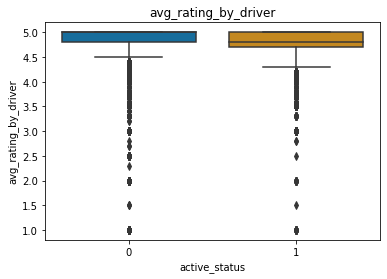

In [40]:
import seaborn as sns

for i in boxplot_columns:
    sns.boxplot(y=user_data[i],x=user_data['active_status'],
                     data=user_data, 
                     palette="colorblind")
    plt.title(i)
    plt.show()

Most graphs above show a slight difference between active and non_active users. 

Active users vs inactive users:

- Travel more in first 30 days
- Rate drivers more stringent
- Have more consistent average surges and more surge %
- Make more consistent money during weekdays
- Travel less distance per ride
- Are rated by drivers more stringent


Lets move on to modeling to decipher signal from noise

# Part 3 - Predictive Modeling

This will be a supervised, binary classification model

In [41]:
user_data.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active_status,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unkown,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,0,1,0,0,0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,1,0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,1,0,0,0,0,1,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,0,1,0,0,0,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,0,1,1,0,0,1,0


In [42]:
user_data.columns

Index(['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active_status', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'phone_Android',
       'phone_Unkown', 'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True'],
      dtype='object')

In [43]:
y = user_data['active_status']

modeling_df = user_data

del modeling_df['signup_date']
del modeling_df['last_trip_date']
del modeling_df['active_status']


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
modeling_df_scaled = scaler.fit_transform(modeling_df)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
# create train/test splits

X_train, X_test, y_train, y_test = train_test_split(modeling_df_scaled, y, test_size=0.3, random_state=42)

In [47]:
# train model

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
# with an imbalanced dataset, we need to look at the confusion matrix

y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[7749, 1774],
       [1866, 3611]])

In [49]:
# View a list of the features and their importance scores

Evaluation_df = pd.DataFrame(model.feature_importances_)
Evaluation_df['Feature Name'] = modeling_df.columns

Evaluation_df.sort_values(ascending=False, by=0)

,0,Feature Name
5,0.290151,avg_dist
4,0.134655,weekday_pct
6,0.109283,avg_rating_by_driver
3,0.082182,surge_pct
0,0.081725,trips_in_first_30_days
1,0.081710,avg_rating_of_driver
2,0.067065,avg_surge
8,0.048719,city_King's Landing
10,0.020579,phone_Android
12,0.020434,phone_iPhone


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      9523
           1       0.67      0.66      0.66      5477

    accuracy                           0.76     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.76      0.76      0.76     15000

